In [ ]:
import random
from math import cos, sin

import checker
import matplotlib.pyplot as plt
import numpy as np
import utils

## Po co nam to numpy?
Przydaje nam się z kilku powodów:
* Napisanie jednej linijki w numpy jest szybsze i wygodniejsze niż napisanie pętli, jest też mniejsza szansa, że zrobimy gdzieś po drodze błąd. Oczywiście najpierw trzeba się przyzwyczaić do intefejsu.
* Numpy jest znacznie bardziej wydajny niż napisane przez nas funkcje w "czystym" Pythonie.
* PyTorch, biblioteka do głębokiego uczenia, z której później będziemy korzystać, ma bardzo podobny interfejs.

### Kilka przykładów

In [ ]:
%%timeit

X = [random.random() for _ in range(10000)]
y = [sin(x) + cos(x) for x in X]

In [ ]:
%%timeit

X = np.random.random(10000)
y = np.sin(X) + np.cos(X)

In [ ]:
def almost_variance(x: np.ndarray) -> np.ndarray:
    """Oblicza 1/n * SUM (x_i - mean(x))^4"""
    m = sum(x) / len(x)
    result = 0
    for i in range(len(x)):
        result += (x[i] - m) ** 4
    result /= len(x)
    return result


def numpy_almost_var(x: np.ndarray) -> np.ndarray:
    m = np.mean(x)
    powers = (x - m) ** 4
    return np.mean(powers)


X = np.random.random(10000)

In [ ]:
%%timeit
almost_variance(X)

In [ ]:
%%timeit
numpy_almost_var(X)

## Zadanie 1. (3 pkt.)
Wykonać poniższe ćwiczenia przy pomocy Numpy:

1. Wykorzystując `broadcasting` (patrz na rysunek poniżej) stwórz funkcję, która dla zadnego $K$ zwraca tabliczkę mnożenia, tzn. tablicę $A$ taką, że: $$A_{ij} = i \cdot j\;\;\;\;\; \forall i,j \in \{1,\dots,K\}$$
    <img src="http://www.astroml.org/_images/fig_broadcast_visual_1.png">

    Przydatne funkcje: `np.arange`, `np.reshape`. 

In [12]:
def multiplication_table(k: int) -> np.ndarray:
    X = np.arange(1,k+1,1)
    Y = np.zeros((k,1))
    Z = X + Y
    return X.reshape((k,1)) * Z


print("Wynik funkcji multiplication:\n", multiplication_table(10))
checker.check_multiplication_table(multiplication_table)

Wynik funkcji multiplication:
 [[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
 [  2.   4.   6.   8.  10.  12.  14.  16.  18.  20.]
 [  3.   6.   9.  12.  15.  18.  21.  24.  27.  30.]
 [  4.   8.  12.  16.  20.  24.  28.  32.  36.  40.]
 [  5.  10.  15.  20.  25.  30.  35.  40.  45.  50.]
 [  6.  12.  18.  24.  30.  36.  42.  48.  54.  60.]
 [  7.  14.  21.  28.  35.  42.  49.  56.  63.  70.]
 [  8.  16.  24.  32.  40.  48.  56.  64.  72.  80.]
 [  9.  18.  27.  36.  45.  54.  63.  72.  81.  90.]
 [ 10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]]


2. Mając daną tablice jednowymiarową oraz liczbę `x` znajdź najbliższą wartość `x` w `A`, tzn. 
    $$ \mathrm{closest}(x, A) = \arg\min_{a\in A}|x - a|  $$

    Przydatne funkcje: `np.argmin`, `np.abs`. 

In [13]:
def closest(x: float, A: np.ndarray) -> np.ndarray:
   return A[np.argmin(np.abs(x - A))]

print("Wynik funkcji closest:", closest(9, np.array([5, 8, 14])))
checker.check_closest(closest)

Wynik funkcji closest: 8


3. Zaimplementuj proste liczenie wartosci wielomianu o zadanych współczynnikach (analogię `np.poly1d`), czyli funkcję

    $$
    \mathrm{poly}(x, a) = a_0 + a_1 x + a_2 x^2 + \dots + a_k x^k = \sum_{i=1}^k a_i x^i
    $$

    Potencjalnie przydatne funkcje: `np.cumprod`, `np.concatenate`, `np.sum`.

In [14]:
def poly(x: int, a: np.ndarray) -> np.ndarray:
    X = np.concatenate((np.array([1]),np.cumprod(np.ones(np.size(a)-1) * x)))
    return np.sum(a * X)
print("Wynik funkcji poly:", poly(3, np.array([1, 2, 4])))
checker.check_poly(poly)

Wynik funkcji poly: 43.0


## Zadanie 2. (2 pkt.)
Dla macierzy $X$ o wymiarze `[N, D]` zaimplementować operację whiteningu: 

$\mathrm{whiten}(X) = (X-\mathrm{mean} X)(\mathrm{cov} X)^{-1/2}$

$\mathrm{mean} X$ rozumiemy jako wektor wierszowy, którego każdy element jest zdefiniowany jako: $$(\mathrm{mean}X)_i = \frac{1}{N} \sum_{j=1}^N X_{ij}$$

**Uwaga 1: np.cov przyjmuje, że każdy wiersz macierzy to osobna cecha, a każda kolumna to osobna obserwacja - czyli odwrotnie niż u nas. Dlatego przed podaniem naszej macierzy do np.cov trzeba ją transponować.**

**Uwaga 2: pierwiastek z macierzy to nie to samo co pierwiastkowanie element-wise, takie jak w np.sqrt. Najlepiej poszukać odpowiedniej funkcji w bibliotece scipy i ją zaimportować.**

In [31]:
from scipy.linalg import eig
def whiten(X: np.ndarray) -> np.ndarray:
    srednia = np.mean(X,axis=0)
    Y = X - srednia
    cov_X = np.linalg.inv(np.cov(np.transpose(X)))
    la,v = eig(cov_X)
    Z = np.dot(np.dot(v,np.diag(np.sqrt(la))),np.linalg.inv(v))
    return np.dot(Y,Z)

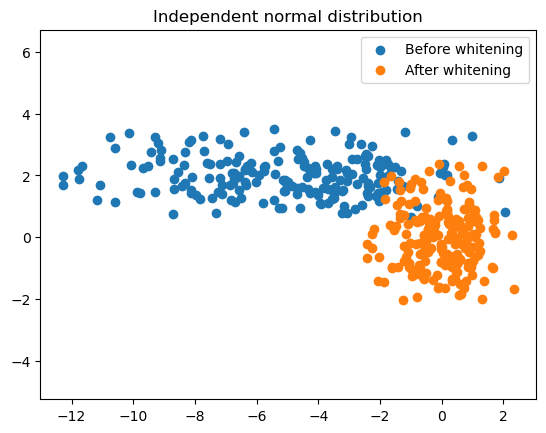

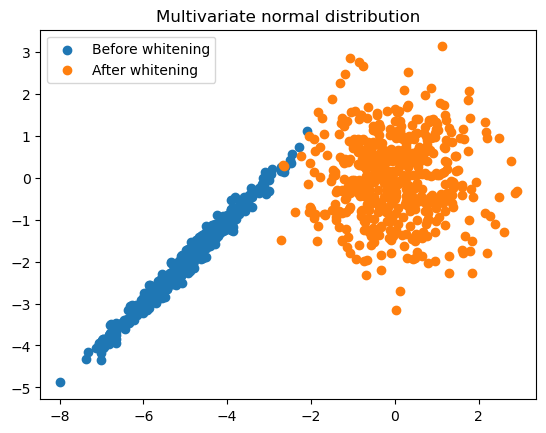

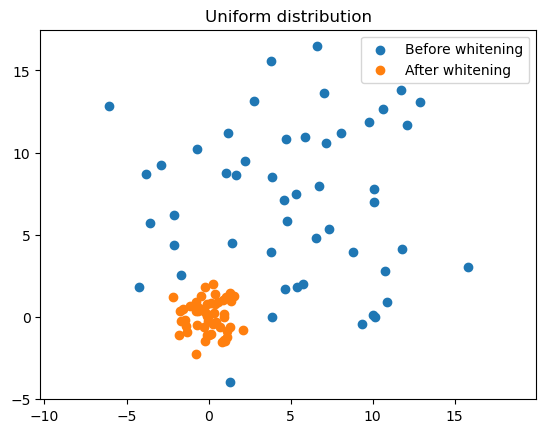

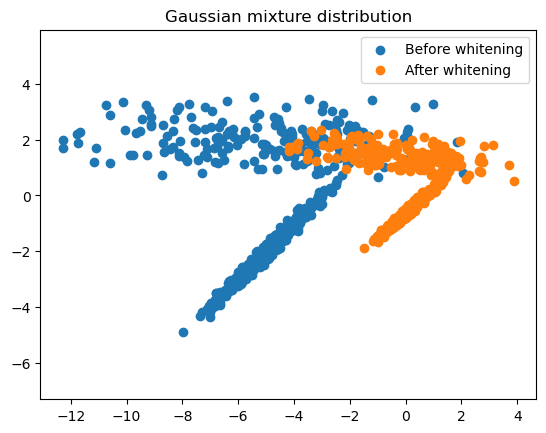

In [32]:
X_diag_normal = np.random.multivariate_normal([-5, 2.0], [[10, 0], [0, 0.5]], size=200)
X_multivariate_normal = np.random.multivariate_normal([-5, -2], [[1, 0.99], [0.99, 1]], size=500)
X_uniform = np.random.normal(6, 5, size=(50, 2))
X_gmm = np.concatenate((X_multivariate_normal, X_diag_normal), axis=0)

utils.scatter_with_whiten(X_diag_normal, whiten, name="Independent normal distribution")
utils.scatter_with_whiten(X_multivariate_normal, whiten, name="Multivariate normal distribution")
utils.scatter_with_whiten(X_uniform, whiten, name="Uniform distribution")
utils.scatter_with_whiten(X_gmm, whiten, name="Gaussian mixture distribution")

## Standaryzacja a whitening
W pierwszym notebooku implementowaliśmy następującą funkcję, która wykonuje zadanie podobne do whiteningu:

$$ f(x_{ij}) = \frac{x_{ij} - \mu_j}{\sigma_j} $$

Tę funkcję nazwijmy **standaryzacją**. Czym zatem różni się standaryzacja od whiteningu? Czy nie wystarczy znormalizować kolumn i zamiast tego musimy wykonywać znacznie bardziej kosztowną operację liczenia i odwracania macierzy kowariancji?

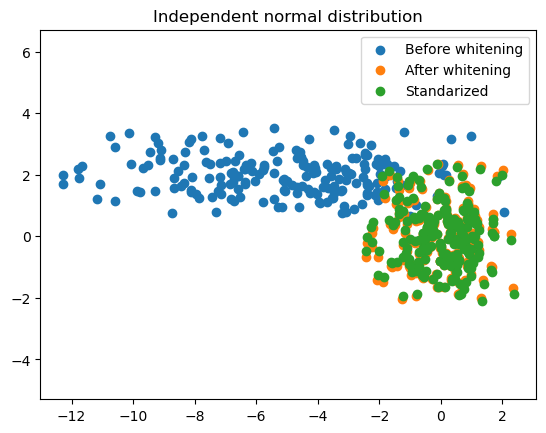

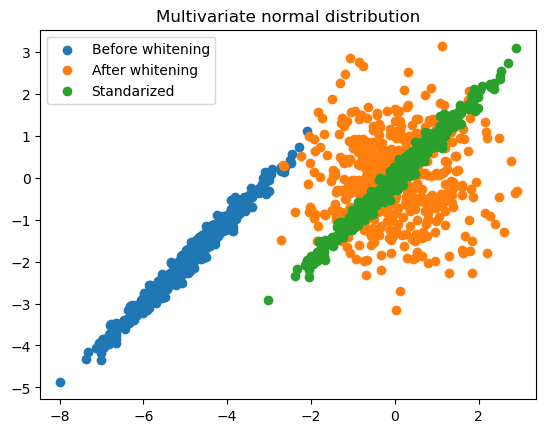

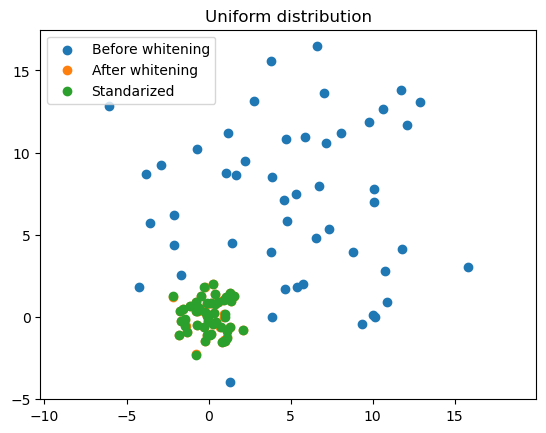

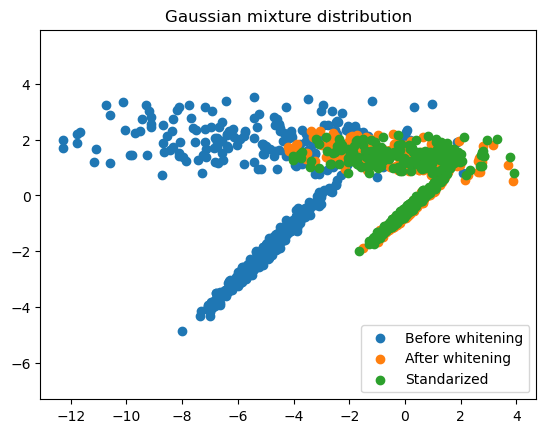

In [33]:
utils.scatter_with_whiten(
    X_diag_normal, whiten, name="Independent normal distribution", standarize=True
)
utils.scatter_with_whiten(
    X_multivariate_normal, whiten, name="Multivariate normal distribution", standarize=True
)
utils.scatter_with_whiten(X_uniform, whiten, name="Uniform distribution", standarize=True)
utils.scatter_with_whiten(X_gmm, whiten, name="Gaussian mixture distribution", standarize=True)

## Zadanie 3. (2 pkt.)
Należy:
1. Wysamplować $10000$ przykładów z rozkładu normalnego $\mathcal{N}(\mu, \sigma)$. **Należy wybrać niestandardowe parametry**, tzn. $\mu \neq 0$ oraz $\sigma \neq 1$.
2. Następnie należy policzyć, jaki procent wylosowanych przykładów, znajduje się od środka w odległości większej niż: 
    * $1\sigma$ (tzn. $|x - \mu| > 1\sigma$)
    * $2\sigma$ (tzn. $|x - \mu| > 2\sigma$)
    * $3\sigma$ (tzn. $|x - \mu| > 3\sigma$)
    
3. Wypisać wszystkie przykłady, które wpadają do ostatniej kategorii (tzn. są oddalone o co najmniej $3\sigma$ od średniej).

32.02 %
4.58 %
0.21 %
[-1.61457102 -1.1350398  11.21357193 -1.23158092 11.43017154 -1.39765329
 11.19450617 11.51336112 -1.10958844 -1.74010306 -1.63090475 -1.64943904
 -1.17575306 -1.27064221 11.10039508 11.3334076  -1.24455608 -1.13561821
 -2.03957348 -1.8893629  11.36582049]


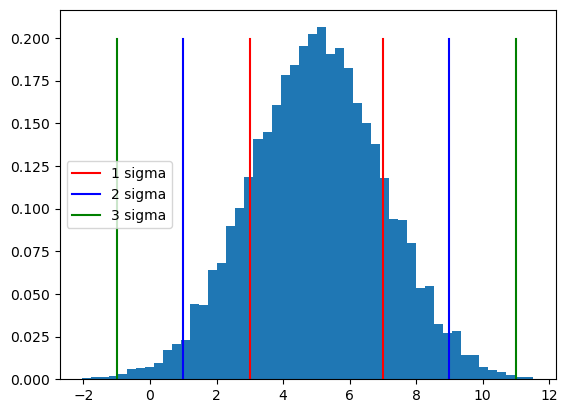

In [34]:
# Podpunkt 1: Wysamplować 10000 przykładów z rozkładu normalnego
loc = 5  # średnia wybranego rozkładu normalnego
scale = 2  # odchylenie standardowe wybranego rozkładu normalnego
X = np.random.normal(loc,scale,size=10000)

# Podpunkt 2: Wyliczyć i wypisać procent 
Y = np.abs(X-loc)
print(np.size(Y[Y > scale])/100,'%')
print(np.size(Y[Y > 2*scale])/100,'%')
print(np.size(Y[Y > 3*scale])/100,'%')
# Podpunkt 3: Wypisać elementy, które są oddalone od średniej o 3 sigma.
print(X[Y>3*scale])
# Trochę wizualizacji
utils.visualize_normal_dist(X, loc, scale)